#  数据规整化：清洗、转换、合并、重塑

###  数据库风格的DataFrame合并

In [1]:
from pandas import DataFrame,Series

In [2]:
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],
                'data1':range(7)})

In [11]:
df2 = DataFrame({'key':['a', 'b','d'], 'data2':range(3)})

In [12]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [13]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [14]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [15]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


### 如果两个对象的列名不同，也可以分别进行指定

In [18]:
df3 = DataFrame({'lkey':['b','b','a','c','a','a','b'],
                'data1':range(7)})

In [20]:
df4 = DataFrame({'rkey':['a','b','d'],
                         'data2':range(3)})

In [21]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [22]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [23]:
pd.merge(df3, df4, left_on='lkey',right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


### 默认情况下，merge做的是“inner”连接，结果中的键是交集。外连接取的是键的bingji：

In [24]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [25]:
# 多对多的合并操作

In [26]:
df1 = DataFrame({'key':['b','b','a','c','a','b'],
                'data1': range(6)})

In [27]:
df2 = DataFrame({'key':['a', 'b', 'a','b','d'],
                'data2': range(5)})

In [28]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [29]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [35]:
df11 = pd.merge(df1, df2, on='key', how='left')
# 多对多连接产生的是行的笛卡尔积，由于左边的df有3个‘b’行，右边的有2个，所以最终结果中有6个‘b’行
# 连接方式只影响出现在结果中的键

In [36]:
df11.sort_values('key')

,data1,key,data2
4,2,a,0.0
5,2,a,2.0
7,4,a,0.0
8,4,a,2.0
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
9,5,b,1.0
10,5,b,3.0


In [39]:
pd.merge(df1, df2, how='inner').sort_values('key')

,data1,key,data2
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3


###  要根据多个键进行合并，传入一个由列名组成的列表即可

In [47]:
left = DataFrame({'key1':['foo','foo','bar'],
                 'key2': ['one','two','one'],
                 'lval':[1, 2, 3]})

In [48]:
right = DataFrame({'key1':['foo','foo','bar','bar'],
                  'key2':['one','one','one','two'],
                  'rval':[4,5,6,7]})

In [49]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [50]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [51]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


### 在进行列-列连接时，DataFrame对象中的索引会被丢弃

In [52]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [53]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### 索引上的合并

#### 有时候连接键位于索引中，此时可以传入lefty_index=True或right_index=True（或两个都传）以说明索引应该被用作连接键：

In [13]:
left1 = DataFrame({'key':['a','b','a','a','b','c'],
                  'value':range(6)})

In [14]:
right1 = DataFrame({'group_val':[3.5, 7]}, index={'a', 'b'})

In [56]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [57]:
right1

,group_val
a,3.5
b,7.0


In [58]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [59]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [61]:
lefth = DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                  'key2':[2000, 2001, 2002, 2001, 2002],
                  'data': np.arange(5.)})

In [69]:
righth = DataFrame(np.arange(12).reshape((6,2)), index=[['Nebada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                                                       [2001,2000,2000,2000,2001,2002]],
                                                       columns = ['event1','event2'])

In [70]:
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [71]:
righth

event1  event2
Nebada 2001       0       1
Nevada 2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [72]:
pd.merge(lefth, righth, left_on=['key1','key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11


In [73]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
        right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,NaN,NaN
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nebada,2001,0.0,1.0
4,NaN,Nevada,2000,2.0,3.0


In [4]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a','c','e'],
                 columns=['Ohio', 'Nevada'])

In [5]:
right2 = DataFrame([[7., 8.], [9., 10.],[11., 12.],[13., 14.]],
                  index=['b','c','d','e'],
                  columns=['Missouri','Alabana'])

In [77]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [78]:
right2

,Missouri,Alabana
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [79]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabana
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


####  join方法，更方便的实现按索引合并，它还可用于合并多个带有相同或相似索引的DataFrame对象，而不管它们之间有没有重叠的列

In [7]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabana
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [8]:
# DataFrame的join方式是在连接键上做左连接
# 它还支持参数DataFrame的索引跟调用者DataFrame的某个列之间的连接

In [15]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [16]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                   index=['a','c','e','f'], columns=['New York', 'Oregon'])

In [17]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabana,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [18]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabana,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### 轴向连接

#### NumPy用于合并原始数组的concatenation函数

In [19]:
arr = np.arange(12.).reshape((3, 4))

In [20]:
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [23]:
np.concatenate([arr, arr], axis=1)

array([[  0.,   1.,   2.,   3.,   0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.,   4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.,   8.,   9.,  10.,  11.]])

#### 假设有三个没有重叠索引的Series：

In [24]:
s1 = Series([0,1], index=['a', 'b'])

In [25]:
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])

In [26]:
s3 = Series([5, 6], index=['f', 'g'])

#### 对这些对象调用concat可以将值和索引粘合在一起

In [27]:
pd.concat([s1, s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

#### 默认情况下。concat的axis=0，最终产生一个新的Series
#### 如果axis=1， 则结果就会变成一个DataFrame(axis=1是列)

In [28]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


#### 传入join='inner即可得到他们的交集

In [29]:
s4 = pd.concat([s1 * 5, s3])

In [30]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [31]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


#### 可以通过join_axes指定要在其他轴上使用的索引

In [32]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c',  'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


#### 想在连接轴上创建一个层次化索引。可以使用keys参数

In [35]:
result = pd.concat([s1, s1, s3], keys=['one','two', 'three'])

In [36]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [37]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [38]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [44]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b','c'],
               columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [46]:
df2 = DataFrame(int(5) + np.arange(4).reshape(2, 2), index=['a', 'c'],
               columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [47]:
pd.concat([df1, df2], axis=1, keys=['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

#### 如果传入的不是列表而是一个字典，则字典的键就会被当作keys选项的值

In [50]:
pd.concat({'level1':df1,'level2':df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [51]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a','b','c','d'])

In [52]:
df2 = DataFrame(np.random.randn(2,3), columns=['b','d','a'])

In [53]:
df1

,a,b,c,d
0,-2.648690,-2.928283,-1.181355,0.393985
1,-0.905464,1.770920,0.459076,-0.550185
2,1.169514,1.220485,-2.010192,-0.368788


In [54]:
df2

,b,d,a
0,-1.934440,-2.336940,-0.914800
1,-1.280028,-0.139215,0.149345


In [58]:
# 改变行索引，使原来的行索引无意义，即不保留连接轴上的索引，产生一组新索引range(total_length)
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-2.648690,-2.928283,-1.181355,0.393985
1,-0.905464,1.770920,0.459076,-0.550185
2,1.169514,1.220485,-2.010192,-0.368788
3,-0.914800,-1.934440,NaN,-2.336940
4,0.149345,-1.280028,NaN,-0.139215


In [56]:
pd.concat([df1, df2])

,a,b,c,d
0,-2.648690,-2.928283,-1.181355,0.393985
1,-0.905464,1.770920,0.459076,-0.550185
2,1.169514,1.220485,-2.010192,-0.368788
0,-0.914800,-1.934440,NaN,-2.336940
1,0.149345,-1.280028,NaN,-0.139215


### 合并重叠数据

In [60]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
          index=['f', 'e', 'd', 'c', 'b', 'a'])

In [61]:
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f','e','d','c','b','a'])

In [62]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [63]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [64]:
b[-1] = np.nan

In [65]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [66]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [67]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [68]:
df1 = DataFrame({'a':[1., np.nan, 5., np.nan],
                'b': [np.nan, 2., np.nan, 6.],
                'c': range(2, 18, 4)})

In [70]:
df2 = DataFrame({'a':[5., 4., np.nan, 3., 7.],
                'b':[np.nan, 3., 4., 6., 8.]})

In [71]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [72]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [73]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


### 重塑和轴向旋转

#### 重新排列表格型数据的基础运算，这些函数被称作重塑（reshape）和轴向旋转（pivot）

#### 重塑层次化索引

1. stack： 将数据的列旋转为行
2. unstack：将数据的行旋转为列

In [77]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                index=pd.Index(['Ohio','Colorado'], name='state'),
                columns=pd.Index(['one', 'two','three'], name='number'))

In [78]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [79]:
# 使用stack将列转成行，得到一个Series
result = data.stack()

In [80]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [81]:
# 对于一个层次化的Series，可以使用unstack将其重排为一个DataFrame

In [82]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


#### 默认情况下，unstack和stack操作的是最内层。传入分层级别的编号或名称即可对其他级别进行操作

In [83]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [84]:
# 如果不是所有的级别值都能在各分组中找到，则unstack操作会引入确实数据
s1 = Series([0,1,2,3], index=['a','b','c','d'])

In [85]:
s2 = Series([4, 5, 6], index=['c','d','e'])

In [86]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [87]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [88]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


#### stack默认会滤出确实数据，因此该运算时可逆的

In [89]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [91]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

#### 对DataFrame进行unstack进行操作时，作为旋转轴级将会成为结果中的最低级别

In [92]:
df = DataFrame({'left' : result, 'right':result + 5},
              columns=pd.Index(['left', 'right'],
                              name= 'side'))

In [93]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [94]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [95]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### 将“长格式”旋转为“宽格式”

pd.load('ch07/ld')

### 数据转换

#### 移除重复数据

In [96]:
# DataFrame中经常会出现重复行：
data = DataFrame({'k1':['one'] * 3 + ['two'] * 4,
                 'k2':[1, 1, 2, 3, 3, 4, 4]})

In [97]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


#### DataFrame的duplicated()方法返回一个布尔型Series，表示各行是否是重复行

In [98]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

#### drop_duplicates方法返回一个移除了重复行的DataFrame

In [99]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


#### 这两个方法默认会判断全部列，也可以指定部分列进行重复项判断

In [100]:
# 假设只根据k1列过滤重复计算

In [101]:
data['v1'] = range(7)

In [102]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


### 利用函数或映射进行数据转换

In [127]:
data = DataFrame({'food' : ['bacon', 'pulled pork', 'bacon','Pastrami','corned beef', 'Bacon','pastrami','honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [128]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [129]:
# 假设想添加一列表示该肉类食物来源的动物类型
# 先编写一个映射

In [130]:
meat_to_animal = {
    'bacon' : 'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox':'salmon'
}

#### Series的map方法可以接受一个函数或含有映射关系的字典型对象

In [131]:
data['annimal'] = data['food'].map(str.lower).map(meat_to_animal)

In [132]:
data

,food,ounces,annimal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [133]:
# 也可以传入一个能够完成全部工作的函数：
data['food'].map(lambda x : meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [134]:
data['animal'] = data['food'].map(lambda x : meat_to_animal[x.lower()])

In [147]:
data.drop('annimal', axis=1)

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### 替换值

In [148]:
data = Series([1., -999, 2., -999., -1000., 3.])

In [149]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [150]:
# -999可能是一个表示缺失数据的标记值，要将其替换为pandas能够理解的NA值，我们可以用replace来产生一个新的Series

In [151]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

#### 如果希望一次传入多个值，可以传入一个由待替换值组成的列表以及一个替换值

In [152]:
data.replace([-999,-1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

#### 如果希望对不同的值进行不同的替换，则传入一个由替换关系组成的列表即可

In [153]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [154]:
# 传入的参数也可以是字典

In [155]:
data.replace({-999:np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### 重命名轴索引

1. 轴标签可以向Series中的值一样，通过函数或映射进行替换
2. 轴可以就地修改，无需新建一个数据结构

In [156]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                index=['Ohio','Colorado','New York'],
                columns=['one','two','three','four'])

#### 跟Series标签一样，轴标签也有一个map方法

In [157]:
data.index.map(str.upper)

Index([u'OHIO', u'COLORADO', u'NEW YORK'], dtype='object')

In [158]:
# 可以直接赋值，就可以就地修改了
data.index = data.index.map(str.upper)

In [159]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


#### 如果是想要创建数据集的转换版本，而不是修改原始数据，可以使用rename方法

In [160]:
data.rename(index= str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


#### rename可以结合字典型对象实现对部分轴标签的更新 

In [162]:
data.rename(index={'HOIO': 'INDIANA'},
           columns={'three':'peekaboo'})

,one,two,peekaboo,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### 离散化和面元（bin）划分

In [163]:
# 假设有一组人员数据，而你希望将他们划分为不同的年龄组

In [164]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [165]:
# 将其划分为“18-25”，“26-35”，“35-60”以及60以上几个面元

In [166]:
bins = [18, 25, 35, 60, 100]

In [167]:
cats = pd.cut(ages, bins)

In [168]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [169]:
# 返回的是一个特殊的Categorical对象，可以看做是一组表示面元名称的字符串

In [172]:
cats.labels  # 标号

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [173]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [184]:
cats.describe

<bound method Categorical.describe of [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]>

In [185]:
cats.get_values

<bound method Categorical.get_values of [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]>

In [186]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [187]:
# 区间开闭情况可以通过right=False修改

In [188]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [189]:
# 可以自己设置面元名称

In [190]:
grouip_names = ['Youth', 'YoungAdult', 'MiddleAged','Senior']

In [191]:
pd.cut(ages, bins, labels=grouip_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

#### 如果向cut传入的是面元的数量而不是确切的面元边界，则它会根据数据的最小值和最大值计算等长面元

In [192]:
data = np.random.randn(20)

In [194]:
pd.cut(data, 4, precision=2)  # 将数据分为4组

[(1.48, 2.66], (-0.87, 0.31], (-0.87, 0.31], (1.48, 2.66], (0.31, 1.48], ..., (-0.87, 0.31], (-2.05, -0.87], (0.31, 1.48], (-0.87, 0.31], (-0.87, 0.31]]
Length: 20
Categories (4, interval[float64]): [(-2.05, -0.87] < (-0.87, 0.31] < (0.31, 1.48] < (1.48, 2.66]]

In [196]:
data = np.random.randn(1000) # 正太分布

In [197]:
cats = pd.qcut(data, 4) # 按四分位数进行切割

In [198]:
cats

[(-2.978, -0.756], (-0.756, -0.0602], (-0.0602, 0.602], (-0.0602, 0.602], (0.602, 2.918], ..., (-0.756, -0.0602], (-2.978, -0.756], (-0.0602, 0.602], (-2.978, -0.756], (-0.756, -0.0602]]
Length: 1000
Categories (4, interval[float64]): [(-2.978, -0.756] < (-0.756, -0.0602] < (-0.0602, 0.602] < (0.602, 2.918]]

In [199]:
pd.value_counts(cats)

(0.602, 2.918]       250
(-0.0602, 0.602]     250
(-0.756, -0.0602]    250
(-2.978, -0.756]     250
dtype: int64

In [201]:
# 也可以设置自定义的分位数（0-1之间的值，包含端点）
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.292, -0.0602], (-1.292, -0.0602], (-0.0602, 1.168], (-0.0602, 1.168], (1.168, 2.918], ..., (-1.292, -0.0602], (-1.292, -0.0602], (-0.0602, 1.168], (-1.292, -0.0602], (-1.292, -0.0602]]
Length: 1000
Categories (4, interval[float64]): [(-2.978, -1.292] < (-1.292, -0.0602] < (-0.0602, 1.168] < (1.168, 2.918]]

### 检测和过滤异常值

#### 异常值也叫孤立点和离群值

In [224]:
np.random.seed(12345)

In [227]:
data = DataFrame(np.random.rand(1000, 4))

In [228]:
data

,0,1,2,3
0,0.822952,0.305272,0.598033,0.747639
1,0.891071,0.881773,0.732910,0.119047
2,0.553461,0.387108,0.233421,0.393985
3,0.671267,0.055173,0.657021,0.542877
4,0.021261,0.915287,0.458971,0.028686
5,0.497803,0.771876,0.827811,0.940157
6,0.901412,0.733529,0.922124,0.721472
7,0.693455,0.071844,0.872457,0.985984
8,0.330219,0.639113,0.243929,0.771501
9,0.794084,0.696750,0.725534,0.580586


In [220]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.491864,0.509591,0.495459,0.510614
std,0.289043,0.294337,0.290806,0.292637
min,0.003314,0.001973,0.001630,0.001231
25%,0.238931,0.248048,0.228687,0.258082
50%,0.487702,0.522888,0.489536,0.495384
75%,0.742035,0.764712,0.745998,0.766676
max,0.998598,0.999973,0.999572,0.998901


In [206]:
# 假设想找出某列中绝对值大小超过3的值

In [221]:
col = data[3]

In [222]:
col[np.abs(col) > 3]

Series([], Name: 3, dtype: float64)

In [223]:
# 选出全部含有“超过2或-2的值”的行，可以利用布尔型DataFrame以及any方法：
data[(np.abs(data) > 2).any(1)]

,0,1,2,3


In [229]:
# 下面的代码可以将值限制在区间-3到3以内

In [233]:
data[np.abs(data) > 3] = np.sign(data) * 3   #np.sign返回的是一个由1和-1组成的数组，表示原始值的符号

In [234]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.491864,0.509591,0.495459,0.510614
std,0.289043,0.294337,0.290806,0.292637
min,0.003314,0.001973,0.001630,0.001231
25%,0.238931,0.248048,0.228687,0.258082
50%,0.487702,0.522888,0.489536,0.495384
75%,0.742035,0.764712,0.745998,0.766676
max,0.998598,0.999973,0.999572,0.998901


### 排列和随机采样

In [235]:
# 通过需要排列的轴的长度调用permutation，可产生一个表示新殊勋的整数数组
df = DataFrame(np.arange(5 * 4).reshape(5, 4))

In [236]:
sampler = np.random.permutation(5)

In [237]:
sampler

array([2, 0, 1, 4, 3])

In [238]:
# 然后就可以基于ix的索引操作或take函数中使用该数组了
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [239]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19
3,12,13,14,15


#### 如果不想用替换的方式选取随机子集，可以使用permutation：从permutation返回的数组中切下前k个元素，期中ke为期望的子集大小

In [240]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
0,0,1,2,3
3,12,13,14,15
1,4,5,6,7


In [241]:
# 要痛快替换的方式产生样本，最快的方式是通过np.random.randint得到一组随机整数
bag = np.array([5, 7, -1, 6, 4])

In [243]:
sampler = np.random.randint(0, len(bag), size=10)

In [244]:
sampler

array([1, 1, 1, 2, 2, 0, 2, 3, 1, 3])

In [245]:
draws = bag.take(sampler)

In [246]:
draws

array([ 7,  7,  7, -1, -1,  5, -1,  6,  7,  6])

### 计算指标\哑变量

#### 另一种常用语统计建模或机器学习的转换方式是：将分类变量（categorical variable）转换为“哑变量矩阵”（dummy matrix）或“指标矩阵”（indicator matrix）

#### 如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）

### pandas有一个get_dummies函数可以实现此功能

In [247]:
df = DataFrame({'key':['b','b','a','c','a','b'],
               'data1':range(6)})

In [248]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [249]:
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [250]:
# 有时候想给DataFrame的列加一个前缀，以便能够跟其他数据进行合并，get_dummies的prefix参数可以实现该功能
dummies = pd.get_dummies(df['key'], prefix='key')

In [251]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [252]:
df_with_dummy = df[['data1']].join(dummies)

In [253]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


#### 如果df中某行同属于多个分类，则事情就会变得有点复杂

In [257]:
mnames = ['movie_id', 'title', 'genres']

In [258]:
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names=mnames)

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [259]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [260]:
genre_iter = (set(x.split('|')) for x in movies.genres)

In [261]:
genre_iter

<generator object <genexpr> at 0x000000000A700750>

In [262]:
genres = sorted(set.union(*genre_iter))

In [264]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [265]:
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 接下来，迭代每一步电影比并将dummies各行设置为1

In [268]:
for i,gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [269]:
# 将其与movies合并起来
movies_windic = movies.join(dummies.add_prefix('Genre_'))

In [272]:
movies_windic.loc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

####  对于很大的数据，用这种方式构建多成员指标变量就会变得非常慢。肯定需要编写一个能够利用DataFrame内部机制的更低级的函数才行

#### 一个对统计应用有用的秘诀是：结合get_dummies和诸如cut之类的离散化函数

In [273]:
values = np.random.rand(10)

In [274]:
values

array([ 0.27057906,  0.40433492,  0.53287655,  0.87859799,  0.09943786,
        0.19758977,  0.01405213,  0.47045859,  0.22434885,  0.33531395])

In [276]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [278]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,0,1,0,0,0


### 字符串操作

####  字符串对象方法

In [279]:
val = 'a,b, guido'

In [280]:
val.split(',')

['a', 'b', ' guido']

In [284]:
#strip可以去掉空格
pieces = [x.strip() for x in val.split(',')]

In [285]:
pieces

['a', 'b', 'guido']

In [286]:
first, second, thrid = pieces

In [287]:
first

'a'

In [289]:
first + '::' + second + '::' + thrid

'a::b::guido'

#### 检测子串的最佳方式是利用Python的in关键字

In [290]:
'guido' in val

True

In [291]:
val.index(',')

1

In [292]:
val.find(':')

-1

#### find和index的区别：如果找不到字符串，index会引发一个异常，find会返回-1

In [293]:
val.index(':')

ValueError: substring not found

#### count函数用于返回指定子串的出现次数

In [295]:
val.count(',')

2

#### replace用于将指定模式替换为另一个模式，它也尝尝用于删除模式：传入空字符串

In [296]:
val.replace(',', '::')

'a::b:: guido'

In [297]:
val.replace(',','')

'ab guido'

### 正则表达式 

In [298]:
import re

In [299]:
text = "foo bar\t baz \tqux"

In [300]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [301]:
regex = re.compile('\s+')

In [302]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [304]:
regex.findall(text)      # 找到匹配regex的所有模式

[' ', '\t ', ' \t']

#### findall返回的是字符串所有的匹配项，search只返回第一个匹配项
#### match更加严格，只匹配字符串的首部

In [310]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""

In [306]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [308]:
regex = re.compile(pattern, flags=re.IGNORECASE)       # re.IGNORECASE作用是使正则表达式对大小不敏感

In [311]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [316]:
m = regex.search(text)      # search返回的是文本中第一个电子邮件地址（以特殊的匹配对象形式返回），
#对于上述regex，匹配对象只能告诉我们模式在原字符串初中起始和结束位置

In [313]:
m

In [314]:
text[m.start():m.end()]

'dave@google.com'

In [317]:
# regex.macth返回None，因为它只匹配出现在字符串开头的模式：
print regex.match(text)

None


In [318]:
# sub方法，将匹配到的模式替换为指定字符串，并返回所得到的新字符串
print regex.sub('REDACTED', text)

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


#### 假设不仅想要找出电子邮件地址，还想将各个地址分成3部分，包括：用户名、域名以及域后缀
#### 要实现此功能，只需要将待分段的模式的各部分用圆括号包起来即可

In [319]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [320]:
regex = re.compile(pattern, flags=re.IGNORECASE)

#### 由这种正则所产生的匹配对象，可以通过其groups方法返回一个由模式各段组成的元祖：

In [321]:
m = regex.match('wesm@bright.net')

In [322]:
m.groups()

('wesm', 'bright', 'net')

In [323]:
# 对于带有分组功能的模式，findall会返回一个元祖列表
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [324]:
# sub还能通过注入\1, \2之类的特殊符号访问各匹配项中的分组
print regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text)

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com


In [325]:
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9._]+)
\.
(?P<suffix>[A-Z]{2,4})
""", flags=re.IGNORECASE|re.VERBOSE)

In [326]:
m = regex.match('werm@bright.net')

In [327]:
m

In [328]:
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'werm'}

In [333]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

### pandas中矢量化的字符串函数

In [334]:
data = {'Dave':'dave@google.com','Stave':'stave@gmail.com',
       'Rob':'rob@gmail.com',
       'Wes':np.nan}

In [335]:
data = Series(data)

In [336]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Stave    stave@gmail.com
Wes                  NaN
dtype: object

In [337]:
data.isnull()

Dave     False
Rob      False
Stave    False
Wes       True
dtype: bool

#### data.map，所有字符串和正则表达式都能被应用于（传入lambda表达式或其他函数）各个值，但是如果存在NA值就会报错

In [340]:
data.str.contains('gmail')  # 检查各个电子邮件地址是否含有“gmail”

Dave     False
Rob       True
Stave     True
Wes        NaN
dtype: object

In [348]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [349]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Stave    [(stave, gmail, com)]
Wes                        NaN
dtype: object

#### 有两个办法可以实现矢量化的元素获取操作：
1. 使用str.get
2. 在str属性上使用索引

In [350]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

In [351]:
matches

Dave     True
Rob      True
Stave    True
Wes       NaN
dtype: object

In [352]:
matches.str.get(1)

Dave    NaN
Rob     NaN
Stave   NaN
Wes     NaN
dtype: float64

In [353]:
matches.str[0]

Dave    NaN
Rob     NaN
Stave   NaN
Wes     NaN
dtype: float64

In [355]:
data.str[:5]   # 对字符串进行截取

Dave     dave@
Rob      rob@g
Stave    stave
Wes        NaN
dtype: object

### 实例：USDA食品数据库

In [356]:
import json

In [357]:
db = json.load(open('ch07/foods-2011-10-03.json'))

In [358]:
len(db)

6636

In [359]:
# db中的每个条目都是一个含有某种食物全部数据的字典
# nutrients字段是一个字典列表，其中的每个字典对应一种营养成分

In [361]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [363]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [364]:
nutrients = DataFrame(db[0]['nutrients'])

In [366]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [367]:
# 在将字典列表转换为DataFrame时，可以只抽取其中的一部分字段，这里，我们将抽取食物的名称、分类、编号以及制造商等信息

In [374]:
info_keys = ['description','group','id','manufacturer']

In [375]:
info = DataFrame(db, columns=info_keys)

In [376]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [377]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [378]:
# 通过value_counts,可以查看书屋类别的分部情况
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [379]:
# 将各个食物的营养成分整合到一个大表中
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [380]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [381]:
# 丢弃重复项
nutrients.duplicated().sum()

14179

In [382]:
nutrients = nutrients.drop_duplicates()

In [383]:
# 由于两个df中都有“group”和“description”，为了区分，对其重命名：
col_mapping = {'description':'food',
              'group':'fgroup'}

In [384]:
info = info.rename(columns=col_mapping, copy=False)

In [385]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [386]:
col_mapping = {'description':'nutrient',
              'group':'nutgroup'}

In [387]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [388]:
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [389]:
# 合并info和nutrients
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [390]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [391]:
ndata.ix[30000]

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [392]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

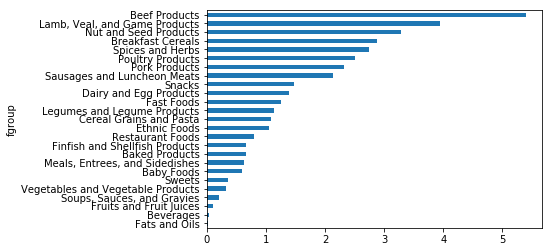

In [401]:
Series.sort_values((result['Zinc, Zn'])).plot(kind='barh')  # 书中的order（）函数不可用

In [408]:
# 找出各营养成分最丰富的食物
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [403]:
get_maximum = lambda x: x.xs(x.value.idxmax())

In [404]:
get_minimum = lambda x:x.xs(x.value.idxmin())

In [405]:
max_foods = by_nutrient.apply(get_maximum)[['value','food']]

In [406]:
# 让food小一点
max_foods.food = max_foods.food.str[:50]

In [407]:
max_foods.ix['Amino Acids']['food']

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [410]:
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          